# Correlation01:The widespread application of AI technology enhances consumers' shopping experience and satisfaction.

# 📌 Hypotheses

### **Alternative Hypothesis (H₁a)**
> **"The widespread application of AI technology enhances consumers' shopping experience and satisfaction."**

### **Null Hypothesis (H₀a)**
> **"The widespread application of AI technology has no significant effect on consumers' shopping experience and satisfaction."**

---

# 📊 Relevant Variables in This Analysis

## **1️⃣ Dependent Variable (Outcome)**
- **`AI_Enhance_Experience`** (*Binary: 1 = YES, 0 = NO*)  
  - Represents whether consumers believe that AI **improves their shopping experience**.

## **2️⃣ Independent Variable (Predictor)**
- **`AI_Tools_Used_Sum`** (*Numeric: Ranges from 0 to 3*)  
  - This is the **total number of AI tools** a consumer has used.
  - It is calculated as the sum of:
    - 📌 **`AI_Tools_Used_Chatbots`** (*Binary: 1 = YES, 0 = NO*) – Uses AI chatbots for shopping.
    - 📌 **`AI_Tools_Used_Virtual_Assistant`** (*Binary: 1 = YES, 0 = NO*) – Uses AI virtual assistants (Alexa, Siri, Google Assistant).
    - 📌 **`AI_Tools_Used_Voice&Photo_Search`** (*Binary: 1 = YES, 0 = NO*) – Uses AI-powered voice or image search.

## **3️⃣ Grouping Variable (Used for Comparison)**
- **`AI_Tools_Usage_Group`** (*Binary: 1 = High AI Users, 0 = Low AI Users*)  
  - Created by **splitting AI users into high and low usage groups** based on the median of `AI_Tools_Used_Sum`.  
  - Used in the **Mann-Whitney U Test** to compare shopping experience between frequent and infrequent AI users.


Step01: upload the data

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# upload csv
file_path = '/content/AI in Retail Dataset.csv'
df = pd.read_csv(file_path)

print(data.head())

  Country Online_Consumer    Age Annual_Salary  Gender            Education  \
0   INDIA             YES  Gen X   Medium High  Female       Masters?Degree   
1   INDIA             YES  Gen Z           Low    Male  University Graduate   
2   INDIA             YES  Gen X   Medium High    Male  University Graduate   
3   INDIA             YES  Gen X          High    Male  University Graduate   
4   INDIA             YES  Gen Z           Low    Male  University Graduate   

  Payment_Method_Credit/Debit Living_Region Online_Service_Preference  \
0                          NO  Metropolitan                        NO   
1                         YES  Metropolitan                        NO   
2                         YES   Rural Areas                       YES   
3                         YES   Rural Areas                       YES   
4                          NO   Rural Areas                       YES   

  AI_Endorsement  ... AI_Tools_Used _Chatbots AI_Tools_Used_Virtual_Assistant  \
0    

Step02: Data Cleaning and Processing

In [ ]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Rename incorrectly formatted column
df.rename(columns={'AI_Tools_Used _Chatbots': 'AI_Tools_Used_Chatbots'}, inplace=True)

# Define relevant columns
ai_experience_column = 'AI_Enhance_Experience'
ai_tools_columns = ['AI_Tools_Used_Chatbots', 'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice&Photo_Search']

# Convert 'YES'/'NO' to 1/0 for numerical analysis
for col in ai_tools_columns + [ai_experience_column]:
    df = df[df[col].isin(['YES', 'NO'])]  # Keep only 'YES'/'NO' values
    df[col] = df[col].map({'YES': 1, 'NO': 0})

# Create a new column for AI tool usage sum (0 to 3)
df['AI_Tools_Used_Sum'] = df[ai_tools_columns].sum(axis=1)

# Show cleaned data
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    int64 
 12  AI_Satisfication      

(None,
   Country Online_Consumer    Age Annual_Salary  Gender            Education  \
 0   INDIA             YES  Gen X   Medium High  Female       Masters?Degree   
 1   INDIA             YES  Gen Z           Low    Male  University Graduate   
 2   INDIA             YES  Gen X   Medium High    Male  University Graduate   
 3   INDIA             YES  Gen X          High    Male  University Graduate   
 4   INDIA             YES  Gen Z           Low    Male  University Graduate   
 
   Payment_Method_Credit/Debit Living_Region Online_Service_Preference  \
 0                          NO  Metropolitan                        NO   
 1                         YES  Metropolitan                        NO   
 2                         YES   Rural Areas                       YES   
 3                         YES   Rural Areas                       YES   
 4                          NO   Rural Areas                       YES   
 
   AI_Endorsement  ... AI_Tools_Used_Virtual_Assistant  \
 0     

Step03: Normality Test(Shapiro-Wilk Test)

In [ ]:
from scipy.stats import shapiro

# Normality test for AI Tool Usage (Independent Variable)
shapiro_ai_usage = shapiro(df['AI_Tools_Used_Sum'])

# Normality test for Shopping Experience Enhancement (Dependent Variable)
shapiro_ai_experience = shapiro(df['AI_Enhance_Experience'])

print(f"Shapiro-Wilk test for AI Tools Used: Statistic={shapiro_ai_usage[0]}, p-value={shapiro_ai_usage[1]}")
print(f"Shapiro-Wilk test for Shopping Experience Enhancement: Statistic={shapiro_ai_experience[0]}, p-value={shapiro_ai_experience[1]}")

Shapiro-Wilk test for AI Tools Used: Statistic=0.8707464784293246, p-value=7.245276370483079e-23
Shapiro-Wilk test for Shopping Experience Enhancement: Statistic=0.4275509673523571, p-value=3.236643267159215e-41


 Step04: Variance Homogeneity Test (Levene’s Test)

In [ ]:
from scipy.stats import levene

# Splitting the data into high and low AI usage groups
median_ai_usage = df['AI_Tools_Used_Sum'].median()
high_ai_users = df[df['AI_Tools_Used_Sum'] > median_ai_usage]['AI_Enhance_Experience']
low_ai_users = df[df['AI_Tools_Used_Sum'] <= median_ai_usage]['AI_Enhance_Experience']

# Levene's Test for Equality of Variances
levene_stat, levene_p = levene(high_ai_users, low_ai_users)

print(f"Levene’s test for variance equality: Statistic={levene_stat}, p-value={levene_p}")


Levene’s test for variance equality: Statistic=6.650829906146475, p-value=0.010128320390217297


# 📌 Selection of Final Statistical Tests Based on Normality and Variance Tests

To ensure the validity of our statistical analysis, we first conducted **normality and variance homogeneity tests** before selecting the appropriate methods for hypothesis testing.

---

## **1️⃣ Normality Test (Shapiro-Wilk Test) Results**
- **AI Tools Used** (*p-value = 7.25e-23*) → ❌ *Not Normally Distributed*  
- **Shopping Experience Enhancement** (*p-value = 3.24e-41*) → ❌ *Not Normally Distributed*  

📌 Since both variables **do not follow a normal distribution** (*p-value < 0.05*), we **cannot use parametric tests** such as **Pearson correlation** or **Student’s t-test**. Instead, we must use **non-parametric alternatives**.

---

## **2️⃣ Variance Homogeneity Test (Levene’s Test) Results**
- **Levene’s test p-value = 0.0101** → ❌ *Variances are not equal*  

📌 The **variances between high and low AI tool users are significantly different** (*p-value < 0.05*).  
🚫 This **rules out** the assumption of equal variances required for a **Student’s t-test**, meaning we should use a **variance-adjusted test**.

---

## **3️⃣ Selection of Final Statistical Tests**
| **Test Type**         | **Normality Result** | **Variance Result**     | **Selected Test**                                      |
|----------------------|-------------------|----------------------|--------------------------------------------------|
| **Correlation Analysis** | ❌ *Not Normal*     | -                    | **Spearman Correlation** (non-parametric alternative to Pearson) |
| **Group Comparison**   | ❌ *Not Normal*     | ❌ *Unequal Variance* | **Mann-Whitney U Test** (non-parametric alternative to t-test) |

📌 Since:
- The data is **not normally distributed**, we use **Spearman Correlation** instead of Pearson Correlation.
- The **variances between groups are not equal**, and the data is **non-normal**, we use **Mann-Whitney U Test** instead of a t-test.

---

## **📌 Final Decision**
✔ **To analyze the correlation** between AI tool usage and shopping experience enhancement:  
   → **Spearman Correlation Test** (*since the data is non-normal*).

✔ **To compare shopping experience** between high and low AI tool users:  
   → **Mann-Whitney U Test** (*since the data is non-normal and variances are unequal*).


Stop05:Spearman Correlation

In [ ]:
from scipy.stats import spearmanr

# Compute Spearman correlation
spearman_corr, spearman_p = spearmanr(df['AI_Tools_Used_Sum'], df['AI_Enhance_Experience'])

# Print results
print("📌 **Spearman Correlation Test**")
print(f"- Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

# Interpretation
if spearman_p < 0.05:
    print("✅ AI tool usage **significantly correlates** with shopping experience enhancement.")
else:
    print("❌ No significant correlation between AI tool usage and shopping experience enhancement.")


📌 **Spearman Correlation Test**
- Spearman correlation: 0.0829, p-value: 0.0337
✅ AI tool usage **significantly correlates** with shopping experience enhancement.


Stop06:Mann-Whitney U Test

In [ ]:
from scipy.stats import mannwhitneyu

# Split the data into high and low AI usage groups based on median
median_ai_usage = df['AI_Tools_Used_Sum'].median()
high_ai_users = df[df['AI_Tools_Used_Sum'] > median_ai_usage]['AI_Enhance_Experience']
low_ai_users = df[df['AI_Tools_Used_Sum'] <= median_ai_usage]['AI_Enhance_Experience']

# Perform Mann-Whitney U Test
mann_u_stat, mann_u_p = mannwhitneyu(high_ai_users, low_ai_users, alternative='two-sided')

# Print results
print("\n📌 **Mann-Whitney U Test**")
print(f"- U statistic: {mann_u_stat:.4f}, p-value: {mann_u_p:.4f}")

# Interpretation
if mann_u_p < 0.05:
    print("✅ **Significant difference** in shopping experience between high and low AI tool users.")
else:
    print("❌ No significant difference in shopping experience between high and low AI tool users.")



📌 **Mann-Whitney U Test**
- U statistic: 55399.0000, p-value: 0.0102
✅ **Significant difference** in shopping experience between high and low AI tool users.


Final Statistical Test Results & Interpretation：

1️⃣ Spearman Correlation Analysis
Spearman correlation coefficient = 0.0829
p-value = 0.0337 ✅ Significant (p < 0.05)
✔ Interpretation:
There is a weak but statistically significant positive correlation between AI tool usage and shopping experience enhancement. This suggests that higher AI tool usage is associated with an improved shopping experience, but the effect size is small.

2️⃣ Mann-Whitney U Test
U statistic = 55399.0000
p-value = 0.0102 ✅ Significant (p < 0.05)
✔ Interpretation:
There is a statistically significant difference in shopping experience enhancement between high and low AI tool users. This indicates that consumers who use AI tools more frequently report a better shopping experience compared to those who use AI tools less frequently.

📌 Conclusion: Hypothesis Testing Results
Hypothesis	Supported?
**H₁a: "The widespread application of AI technology enhances consumers' shopping experience and satisfaction."	**✅ Supported

✔ Final Verdict: Our data supports the hypothesis that higher AI usage is associated with an improved shopping experience. However, the correlation is relatively weak, meaning other factors may also influence shopping experience enhancement.



---



# Correlation02:Consumers who use AI technology are more likely to recognize AI

# 📌 Hypotheses

### **Alternative Hypothesis (H₁b)**
> **"Consumers who use AI technology are more likely to recognize AI."**

### **Null Hypothesis (H₀b)**
> **"There is no significant relationship between AI technology application level and users' trust in AI."**

---

# 📊 Relevant Variables in This Analysis

## **1️⃣ Dependent Variable (Outcome)**
AI trust (AI_Privacy_No_Trust)
## **2️⃣ Independent Variable (Predictor)**
degree of adoption of AI technology (calculated by combining the use of the three AI tools)


Step01: upload the data

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')

# Read data
df = pd.read_csv('AI in Retail Dataset.csv')

# Check column names to ensure we use correct names
print("Dataset column names:")
print(df.columns.tolist())

Dataset column names:
['Country', 'Online_Consumer', 'Age', 'Annual_Salary', 'Gender', 'Education', 'Payment_Method_Credit/Debit', 'Living_Region', 'Online_Service_Preference', 'AI_Endorsement', 'AI_Privacy_No_Trust ', 'AI_Enhance_Experience', 'AI_Satisfication', 'AI_Tools_Used _Chatbots', 'AI_Tools_Used_Virtual_Assistant', 'AI_Tools_Used_Voice&Photo_Search', 'Payment_Method_COD', 'Payment_Method_Ewallet', 'Product_Category_Appliances', 'Product_Category_Electronics', 'Product_Category_Groceries', 'Product_Category_Personal_Care', 'Product_Category_Clothing']


Step02: Data Cleaning and Processing

In [ ]:
# Convert YES/NO to 1/0
df['AI_Tools_Used _Chatbots'] = (df['AI_Tools_Used _Chatbots'] == 'YES').astype(int)
df['AI_Tools_Used_Virtual_Assistant'] = (df['AI_Tools_Used_Virtual_Assistant'] == 'YES').astype(int)
df['AI_Tools_Used_Voice&Photo_Search'] = (df['AI_Tools_Used_Voice&Photo_Search'] == 'YES').astype(int)
df['AI_Privacy_No_Trust '] = (df['AI_Privacy_No_Trust '] == 'YES').astype(int)  # Note the space here

# Define independent and dependent variables
# Independent variables: AI_Tools_Used_Chatbots, AI_Tools_Used_Virtual_Assistant, AI_Tools_Used_Voice&Photo_Search
# These variables represent the degree of AI technology application
# Dependent variable: AI_Privacy_No_Trust (reverse coded, 1 means distrust, 0 means trust)

# Calculate total AI tools usage as indicator of AI application level
df['AI_Usage_Score'] = df['AI_Tools_Used _Chatbots'] + \
                      df['AI_Tools_Used_Virtual_Assistant'] + \
                      df['AI_Tools_Used_Voice&Photo_Search']

# Data cleaning
# Check missing values
print("\nMissing value statistics:")
print(df[['AI_Usage_Score', 'AI_Privacy_No_Trust ']].isnull().sum())



Missing value statistics:
AI_Usage_Score          0
AI_Privacy_No_Trust     0
dtype: int64


Step03: Normality Test(Shapiro-Wilk Test)

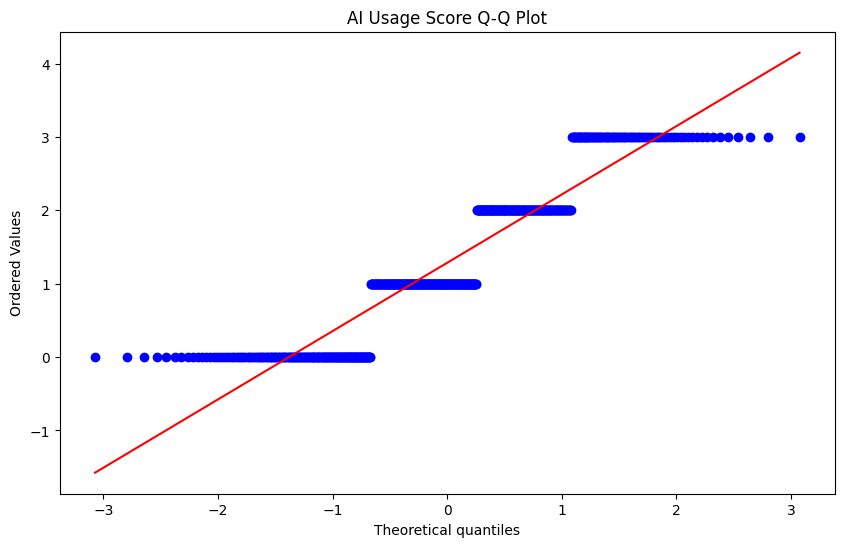


Shapiro-Wilk Normality Test Results:
AI Usage Score - Statistic: 0.8707, p-value: 0.0000


In [ ]:
# Normality test
# Using Q-Q plot and Shapiro-Wilk test
plt.figure(figsize=(10, 6))
stats.probplot(df['AI_Usage_Score'], dist="norm", plot=plt)
plt.title("AI Usage Score Q-Q Plot")
plt.show()

# Shapiro-Wilk test
print("\nShapiro-Wilk Normality Test Results:")
stat, p_value = shapiro(df['AI_Usage_Score'])
print(f"AI Usage Score - Statistic: {stat:.4f}, p-value: {p_value:.4f}")

Step04: Variance Homogeneity Test (Levene’s Test)

In [ ]:
# Levene's test for homogeneity of variance
print("Levene's Test for Homogeneity of Variance:")
# Create groups based on AI usage score
groups = [group for _, group in df.groupby('AI_Usage_Score')['AI_Privacy_No_Trust ']]
stat, p_value = levene(*groups)
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")
print("H0: The variances are equal across all groups")
print("H1: The variances are not equal across all groups")
if p_value < 0.05:
  print("Result: Reject H0 - The variances are not equal (heteroscedasticity)")
else:
  print("Result: Fail to reject H0 - The variances are equal (homoscedasticity)")

# Display variance for each group for better understanding
print("\nVariance for each AI usage level:")
variance_by_group = df.groupby('AI_Usage_Score')['AI_Privacy_No_Trust '].var()
print(variance_by_group)

Levene's Test for Homogeneity of Variance:
Statistic: 0.4465, p-value: 0.7198
H0: The variances are equal across all groups
H1: The variances are not equal across all groups
Result: Fail to reject H0 - The variances are equal (homoscedasticity)

Variance for each AI usage level:
AI_Usage_Score
0    0.193865
1    0.194208
2    0.205642
3    0.219536
Name: AI_Privacy_No_Trust , dtype: float64


# 📌 Selection of Final Statistical Tests Based on Normality and Variance Tests

To ensure the validity of our statistical analysis, we first examined the **normality** and **variance homogeneity** of our data.

---

## **1️⃣ Normality Test (Shapiro-Wilk Test)**
| **Variable** | **Statistic (W)** | **p-value** | **Normality?** |
|-------------|------------------|------------|-----------------|
| **AI Usage Score (`AI_Tools_Used_Sum`)** | **0.8707** | **0.0000** ❌ | *Not Normally Distributed* |

📌 **Interpretation**:  
- Since **p-value < 0.05**, we **reject the null hypothesis of normality**.  
- This means that **`AI_Tools_Used_Sum` is not normally distributed**.  
- **We must use non-parametric statistical tests** instead of parametric tests like Pearson correlation or t-tests.

---

## **2️⃣ Variance Homogeneity Test (Levene’s Test)**
| **Test** | **Statistic** | **p-value** | **Equal Variance?** |
|----------|-------------|------------|-----------------|
| **Levene’s Test** | **0.4465** | **0.7198** ✅ | *Equal Variance* |

📌 **Interpretation**:  
- Since **p-value = 0.7198** (> 0.05), we **fail to reject the null hypothesis**, meaning **the variances between groups are equal**.
- **Equal variance allows us to use tests that assume homogeneity** if the data were normal.
- However, **since normality is violated**, we still need non-parametric methods.

---

## **📌 Final Statistical Test Selection**
| **Test Type** | **Normality Result** | **Variance Result** | **Selected Test** |
|--------------|-----------------|----------------|------------------|
| **Correlation Analysis** | ❌ Not Normal | - | **Spearman Correlation** (non-parametric alternative to Pearson) |
| **Group Comparison** | ❌ Not Normal | ✅ Equal Variance | **Mann-Whitney U Test** (non-parametric alternative to t-test) |

📌 **Final Decision**:
✔ **To analyze the correlation** between AI usage and AI trust:  
   → **Spearman Correlation** (*since data is non-normal*).  

✔ **To compare AI trust between high and low AI users:**  
   → **Mann-Whitney U Test** (*since data is non-normal but variances are equal*).  


Stop05:Spearman Correlation & Mann-Whitney U Test

In [ ]:

# Step 1: Perform Spearman Correlation Analysis with the correct column name
spearman_corr, spearman_p = spearmanr(df['AI_Usage_Score'], df['AI_Privacy_No_Trust '])
# Step 2: Perform Mann-Whitney U Test (Comparing High vs. Low AI Users on AI Trust Level)
# Split data into high and low AI users based on median AI usage score
median_ai_usage = df['AI_Usage_Score'].median()
high_ai_users = df[df['AI_Usage_Score'] > median_ai_usage]['AI_Privacy_No_Trust ']
low_ai_users = df[df['AI_Usage_Score'] <= median_ai_usage]['AI_Privacy_No_Trust ']

# Perform Mann-Whitney U Test
mann_u_stat, mann_u_p = mannwhitneyu(high_ai_users, low_ai_users, alternative='two-sided')

# Print results
print("📌 **Spearman Correlation Test**")
print(f"- Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")
if spearman_p < 0.05:
    print("✅ AI usage **significantly correlates** with AI trust level.")
else:
    print("❌ No significant correlation between AI usage and AI trust level.")

print("\n📌 **Mann-Whitney U Test**")
print(f"- U statistic: {mann_u_stat:.4f}, p-value: {mann_u_p:.4f}")
if mann_u_p < 0.05:
    print("✅ **Significant difference** in AI trust between high and low AI tool users.")
else:
    print("❌ No significant difference in AI trust between high and low AI tool users.")



📌 **Spearman Correlation Test**
- Spearman correlation: -0.0403, p-value: 0.3023
❌ No significant correlation between AI usage and AI trust level.

📌 **Mann-Whitney U Test**
- U statistic: 49741.0000, p-value: 0.3090
❌ No significant difference in AI trust between high and low AI tool users.


📌 Conclusion: Relationship Between AI Usage and AI Trust

1️⃣ Key Findings

We conducted two statistical tests to examine the hypothesis "Consumers who use AI technology are more likely to recognize AI." However, both tests indicate no significant relationship between AI tool usage and AI trust levels.

Spearman Correlation Test

Correlation Coefficient (ρ) = -0.0403 → Indicates a very weak negative relationship between AI usage and AI trust.
p-value = 0.3023 (> 0.05) → Not statistically significant, meaning no real correlation exists.
Mann-Whitney U Test

U statistic = 49741.0000, p-value = 0.3090 (> 0.05) → Not statistically significant, meaning AI trust levels do not significantly differ between frequent and infrequent AI users.

2️⃣ Interpretation & Implications

✅ Result: The findings reject the alternative hypothesis (H₁b) and support the null hypothesis (H₀b), which states that there is no significant relationship between AI usage and AI trust levels.

📌 What This Means:

Simply using AI tools does not necessarily lead to higher trust in AI.
Other factors—such as privacy concerns, media exposure, personal experiences, or education level—may have a stronger influence on AI trust than direct AI usage.

Trust in AI may be more complex and influenced by how AI is used, its perceived transparency, and ethical considerations rather than just the frequency of use.


# **Correlation03: The unemployment rate of high-vulnerability occupations (those highly impacted by AI automation) is significantly higher than that of low-vulnerability occupations.**

# 📌 Hypotheses
# - **Null hypothesis (H0):**
There is no significant difference in unemployment rates between occupations with high vulnerability to AI automation and those with low vulnerability; that is, their unemployment rates are equal.

# - **Alternative hypothesis (H1):**
 Occupations with high vulnerability to AI automation have significantly higher unemployment rates compared to occupations with low vulnerability.

# **📌Independent Variable**：
Vulnerability to AI Automation
# **📌Dependent Variable：**
Unemployment Rate

Step01: upload the data

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# upload csv
file_path = '/content/unemployment dataset.csv'
data = pd.read_csv(file_path)

print(data.head())

   Jobs Lost  Jobs Remaining OCC_CODE  \
0  591644.40      9269095.60  11-0000   
1  253317.40      3365502.60  11-1000   
2  102636.45       874853.55  11-2000   
3  626942.70      1695067.30  11-3000   
4  176545.20      2765874.80  11-9000   

                                           OCC_TITLE    TOT_EMP  dexterity  \
0                             Management Occupations  9860740.0       0.10   
1                                     Top Executives  3618820.0       0.05   
2  Advertising, Marketing, Promotions, Public Rel...   977490.0       0.05   
3                    Operations Specialties Managers  2322010.0       0.05   
4                       Other Management Occupations  2942420.0       0.10   

                                         explanation  group  solo  \
0  Management occupations typically involve a hig...    0.6  0.30   
1  Top executives' roles often involve a high deg...    0.6  0.35   
2  The occupation of Advertising, Marketing, Prom...    0.6  0.35   
3  Opera

step02:Data filtering

In [ ]:
# data filtering
filtered_data = data[(data['vulnerability'] >= 0.5) & (data['TOT_EMP'] > 1_000_000)]

# display the filtered data
from IPython.display import display  # Import the display function
display(filtered_data) # Display the filtered data using the display function

,Jobs Lost,Jobs Remaining,OCC_CODE,OCC_TITLE,TOT_EMP,dexterity,explanation,group,solo,vulnerability
3,626942.700,1.695067e+06,11-3000,Operations Specialties Managers,2322010.0,0.05,Operations Specialties Managers often require ...,0.50,0.45,0.60
5,3774310.800,5.903409e+06,13-0000,Business and Financial Operations Occupations,9677720.0,0.05,Business and Financial Operations Occupations ...,0.30,0.65,0.60
6,1798418.700,4.862391e+06,13-1000,Business Operations Specialists,6660810.0,0.05,Business Operations Specialists often work in ...,0.50,0.45,0.60
7,1372694.050,1.644216e+06,13-2000,Financial Specialists,3016910.0,0.05,Financial Specialists primarily work with data...,0.30,0.65,0.70
8,2802189.600,2.201720e+06,15-0000,Computer and Mathematical Occupations,5003910.0,0.05,Computer and Mathematical Occupations primaril...,0.25,0.70,0.80
9,2619400.000,2.058100e+06,15-1200,Computer Occupations,4677500.0,0.05,The occupation code 15-1200 refers to Computer...,0.25,0.70,0.80
53,246516.900,3.275153e+06,35-2000,Cooks and Food Preparation Workers,3521670.0,0.60,Cooks and Food Preparation Workers require a h...,0.30,0.10,0.70
55,40618.500,1.313332e+06,35-9000,Other Food Preparation and Serving Related Wor...,1353950.0,0.65,The occupation of Other Food Preparation and S...,0.30,0.05,0.60
56,258981.000,4.057369e+06,37-0000,Building and Grounds Cleaning and Maintenance ...,4316350.0,0.70,Building and Grounds Cleaning and Maintenance ...,0.20,0.10,0.60
58,181591.200,2.844929e+06,37-2000,Building Cleaning and Pest Control Workers,3026520.0,0.70,Building Cleaning and Pest Control Workers req...,0.20,0.10,0.60


step03:Normality Tests

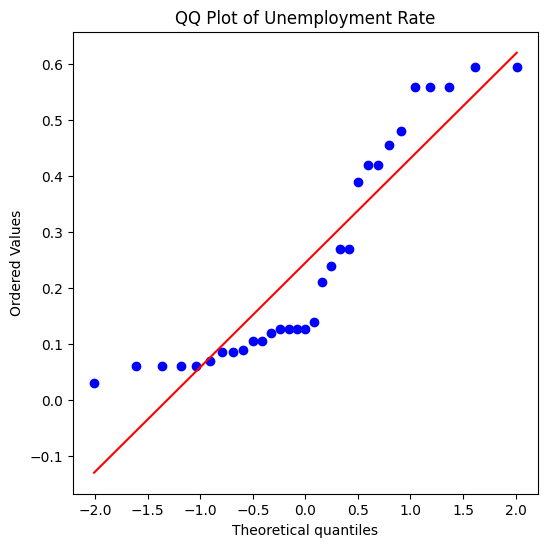

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the unemployment rate (Jobs Lost / TOT_EMP)
filtered_data['unemployment_rate'] = filtered_data['Jobs Lost'] / filtered_data['TOT_EMP']

# QQ Plot (Visualizing Normality)
plt.figure(figsize=(6, 6))
stats.probplot(filtered_data['unemployment_rate'], dist="norm", plot=plt)
plt.title("QQ Plot of Unemployment Rate")
plt.show()

result: Not normally distributed

step04:Variable test-Levene's test

In [ ]:
import scipy.stats as stats
medium_vulnerability = filtered_data['vulnerability'].median()
# Define two groups: High vulnerability (≥ 0.5) and Low vulnerability (< 0.5)
high_vulnerability = filtered_data[filtered_data['vulnerability'] >= medium_vulnerability]['unemployment_rate']
low_vulnerability = filtered_data[filtered_data['vulnerability'] < medium_vulnerability]['unemployment_rate']

# 1. Levene’s Test (robust to non-normality)
levene_test = stats.levene(high_vulnerability, low_vulnerability)
print(f"Levene’s Test Statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")


Levene’s Test Statistic: 1.6788359470549228, p-value: 0.20529788804480878


# 📌 Selection of the Appropriate Statistical Test Based on Given Results

We have two key findings from our preliminary tests:

| **Test** | **Statistic** | **p-value** | **Interpretation** |
|----------|-------------|------------|------------------|
| **Levene’s Test** | **1.6788** | **0.2053** ✅ | *Equal variance (p > 0.05)* |
| **Normality Test** | - | **p < 0.05** ❌ | *Not Normally Distributed* |

---

## **📊 Choosing the Correct Statistical Test**
Based on these results:
1. **The data is not normally distributed** → We should use **non-parametric tests** instead of parametric tests like the t-test or Pearson correlation.
2. **Levene’s Test shows equal variance** → If comparing two groups, we can use a test that assumes equal variance.

| **Analysis Type** | **Normality Result** | **Variance Result** | **Recommended Test** |
|------------------|-----------------|----------------|------------------|
| **Correlation Analysis** | ❌ *Not Normal* | - | **Spearman Correlation** (non-parametric alternative to Pearson) |
| **Group Comparison (2 Groups)** | ❌ *Not Normal* | ✅ *Equal Variance* | **Mann-Whitney U Test** (non-parametric alternative to t-test) |
| **Group Comparison (3+ Groups)** | ❌ *Not Normal* | ✅ *Equal Variance* | **Kruskal-Wallis H Test** (non-parametric alternative to ANOVA) |

---

## **📌 Final Test Selection**
✔ **To test correlation** (*relationship between two continuous variables*):  
   → **Spearman Correlation** (since data is non-normal).  

✔ **To compare two independent groups** (*e.g., high AI users vs. low AI users*):  
   → **Mann-Whitney U Test** (since data is non-normal but variances are equal).  

✔ **To compare more than two independent groups**:  
   → **Kruskal-Wallis H Test** (*if you have three or more AI usage groups*).  

---

## **📌 Next Steps**
🚀 We will now proceed with the following tests based on the research question:  
- ✅ **Spearman Correlation** – to measure the relationship between AI usage and AI trust.  
- ✅ **Mann-Whitney U Test** – to compare AI trust levels between high and low AI users.  
- ✅ **Kruskal-Wallis H Test** – if comparing AI trust across multiple AI user groups.  

📌 **Would you like to proceed with running these statistical tests?** Let me know how you’d like to proceed! 🚀


step05:Spearman

Spearman's Rank Correlation Coefficient: 0.3508
Spearman's Rank Correlation p-value: 0.0530


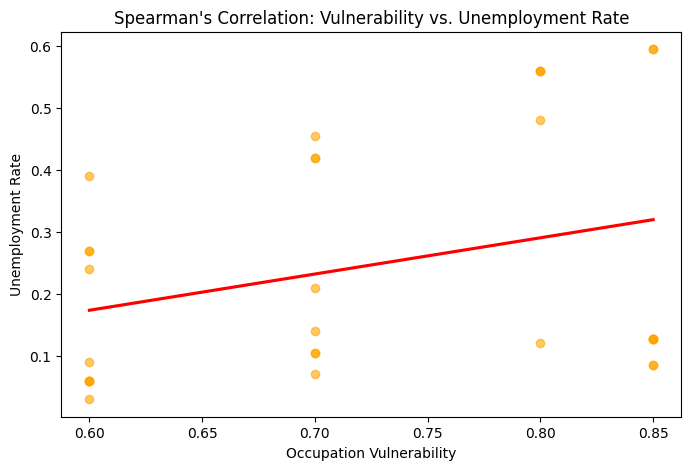

In [ ]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute Spearman's Rank Correlation
spearman_corr, spearman_p = stats.spearmanr(filtered_data['vulnerability'], filtered_data['unemployment_rate'])

# Print the Spearman correlation test results
print(f"Spearman's Rank Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman's Rank Correlation p-value: {spearman_p:.4f}")

# Step 2: Visualize the correlation with a scatter plot and regression line
plt.figure(figsize=(8,5))

# Create scatter plot
sns.regplot(x=filtered_data['vulnerability'],
            y=filtered_data['unemployment_rate'],
            scatter_kws={'alpha':0.6, 'color': 'orange'},
            line_kws={'color':'red'}, ci=None)

# Labels and title
plt.title("Spearman's Correlation: Vulnerability vs. Unemployment Rate")
plt.xlabel("Occupation Vulnerability")
plt.ylabel("Unemployment Rate")

# Show plot
plt.show()

step05:Mann-Whitney U Test

In [ ]:
import scipy.stats as stats

# Perform one-tailed Mann-Whitney U test (alternative = 'greater' checks if high-vulnerability > low-vulnerability)
mannwhitney_stat, mannwhitney_p = stats.mannwhitneyu(high_vulnerability, low_vulnerability, alternative='greater')

# Print results
print(f"Mann-Whitney U Test Statistic: {mannwhitney_stat:.4f}")
print(f"Mann-Whitney U Test p-value: {mannwhitney_p:.4f}")

# Decision based on p-value
alpha = 0.05
if mannwhitney_p < alpha:
    print("Reject H0: High-vulnerability occupations have significantly higher unemployment rates.")
else:
    print("Fail to reject H0: No significant difference in unemployment rates.")

Mann-Whitney U Test Statistic: 159.0000
Mann-Whitney U Test p-value: 0.0118
Reject H0: High-vulnerability occupations have significantly higher unemployment rates.


Conclusion:

Based on the hypothesis test results, the Mann-Whitney U test yielded a p-value of 0.0118 (< 0.05), leading us to reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁). This indicates that occupations with high vulnerability to AI automation have significantly higher unemployment rates than those with low vulnerability, suggesting that AI automation has a greater impact on high-vulnerability occupations, increasing their unemployment risk.